### Exercício 01 - Subespaço

Considere, em $\mathbb{R}^3$, o plano dado pela equação $x+y-z=0$.
Os vetores $u=[1, 0, 1]^\top$ e $v=[0, 1, 1]^\top$ pertencem a tal plano (como verificar esta afirmação?). Qualquer combinação linear $w=au + bv$, com $a,b\in \mathbb{R}$, pertence ao plano, pois

$$
w = \begin{bmatrix} a \\ b \\ a+b \end{bmatrix}.
$$

Logo o plano corresponde a um subespaço de $\mathbb{R}^3$.
- Implemente uma visualização desse subespaço com os vetores $u$ e $v$ e uma combinação linear qualquer desses vetores.

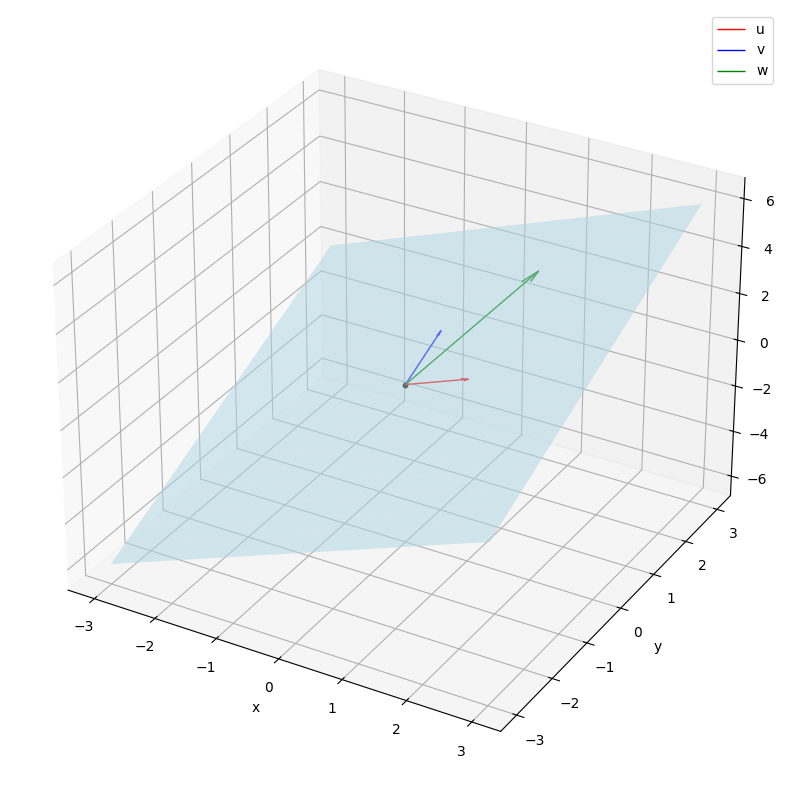

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Vetores u e v
u = np.array([1, 0, 1])
v = np.array([0, 1, 1])

# w = a*u + b*v (combinação linear)
a = 1
b = 2
w = a * u + b * v

# Criando o gráfico
graf = plt.figure(figsize=(12, 10))
eixos = graf.add_subplot(111, projection='3d')

# Desenhando o plano
planoX = np.linspace(-3, 3, 20)
planoY = np.linspace(-3, 3, 20)
x, y = np.meshgrid(planoX, planoY)
z = x + y  # x + y - z = 0 => z = x + y
eixos.plot_surface(x, y, z, alpha=0.5, color='lightblue')

# Origem
eixos.scatter([0], [0], [0], color='black', s=10)

# Vetores u e v
eixos.quiver(0, 0, 0, u[0], u[1], u[2], color='red', linewidth=1, arrow_length_ratio=0.1, label='u')
eixos.quiver(0, 0, 0, v[0], v[1], v[2], color='blue', linewidth=1, arrow_length_ratio=0.1, label='v')

# Combinação linear w
eixos.quiver(0, 0, 0, w[0], w[1], w[2], color='green', linewidth=1, arrow_length_ratio=0.1, label='w')

# Legendas dos eixos
eixos.set_xlabel('x')
eixos.set_ylabel('y')
eixos.set_zlabel('z')

eixos.legend() # Adicionando legenda
eixos.grid(True) # Adicionando grade
plt.show() # Mostrando o gráfico

### Exercício 02 - Mudança de base
Considere a base $B$ de $\mathbb{R}^3$ formada pelos vetores $(1,0,1)$, $(1,1,1)$ e $(1,1,2)$. Considere também a base $C$ formada pelos vetores $(1,0,0)$, $(0,1,0)$ e $(0,0,1)$.
- Calcule $M_B^C$ e $M_C^B$
- Generalize o cálculo da matriz de mudança de base em uma função.
- Sejam as coordenadas do vetor $v$ em relação a base $C$ dadas por $v_C = [8, 7, 1]^\top$. Calcule as coordenadas do vetor $v$ em relação a base $B$.

In [ ]:
import numpy as np

# A -> B
def gerar_matriz(A, B):
    matrizMudanca = []
    # Pegando cada linha da matriz A
    for linha in B:
        # Resolvendo o sistema dessa linha,
        # obtendo os coeficientes da coluna
        coeficientes = np.linalg.solve(A, linha)

        # Jogando os coeficientes na matriz mudança de base
        matrizMudanca.append(coeficientes)

    return matrizMudanca

def mudar_base(vetorOriginal, baseOriginal, baseNova):
    # Obtendo a matriz de mudança de base
    matrizMudBase = gerar_matriz(baseNova, baseOriginal)
    # Multiplicando o vetor velho pela matriz de mud.
    vetorNovo = np.matmul(matrizMudBase, vetorOriginal.T)
    # OBS: .T no vetorOriginal para o transformar em coluna
    # e a multiplicação dar certo

    return vetorNovo    

# Bases
B = np.array([[1, 0 ,1], [1, 1, 1], [1, 1, 2]])
C = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

matrizBC = gerar_matriz(B, C)
print("Matriz B -> C:")
print(np.matrix(matrizBC)) # np.matrix() só pra formatar

print("")

matrizCB = gerar_matriz(C, B)
print("Matriz C -> B:")
print(np.matrix(matrizCB))

print("")

vC = np.array([8, 7, 1])
print("Vetor v na base C:")
print(mudar_base(vC, C, B))

Matriz B -> C:
[[ 1. -1.  0.]
 [ 1.  1. -1.]
 [-1.  0.  1.]]

Matriz C -> B:
[[1. 0. 1.]
 [1. 1. 1.]
 [1. 1. 2.]]

Vetor v na base C:
[ 1. 14. -7.]
